<h1>Содержание</h1>
<div>
	<ul>
		<li>Загрузка, ислледование, очистка данных</li>
		<li>Corellation and PCA</li>
		<li>Hyperparameter Tuning</li>
		<li>Обучение финальной модели</li>
	</ul>
</div>

## Загрузка, ислледование, очистка данных

### Импорт библиотек

In [1]:
import time
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(37)

## Основные действия с данными
### Загрузка данных

In [2]:
train_full = pd.read_csv('./data/course_project_train.csv')
test_full = pd.read_csv('./data/course_project_test.csv')

Выводим данные для первичного визуального анализа

In [3]:
display(train_full.head(), train_full.shape)
display(test_full.head(), test_full.shape)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


(7500, 17)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


(2500, 16)

Напишем функцию для вывода информации о пропущенных и уникальных данных 

In [4]:
def nans_and_unique(df):
    for col in df.columns:
        print(col)
        print('.'*25)
        print('Количество пустых значений',df[col].isna().sum())
        print('Количество уникальных занчений:',len(df[col].unique()))
        print('-'*25)

Пропущенные и уникальные данные тренировочного датасета

In [5]:
nans_and_unique(train_full)

Home Ownership
.........................
Количество пустых значений 0
Количество уникальных занчений: 4
-------------------------
Annual Income
.........................
Количество пустых значений 1557
Количество уникальных занчений: 5479
-------------------------
Years in current job
.........................
Количество пустых значений 371
Количество уникальных занчений: 12
-------------------------
Tax Liens
.........................
Количество пустых значений 0
Количество уникальных занчений: 8
-------------------------
Number of Open Accounts
.........................
Количество пустых значений 0
Количество уникальных занчений: 39
-------------------------
Years of Credit History
.........................
Количество пустых значений 0
Количество уникальных занчений: 408
-------------------------
Maximum Open Credit
.........................
Количество пустых значений 0
Количество уникальных занчений: 6963
-------------------------
Number of Credit Problems
.........................


Пропущенные данные и уникальные данные тестового датасета

In [6]:
nans_and_unique(test_full)

Home Ownership
.........................
Количество пустых значений 0
Количество уникальных занчений: 4
-------------------------
Annual Income
.........................
Количество пустых значений 513
Количество уникальных занчений: 1930
-------------------------
Years in current job
.........................
Количество пустых значений 86
Количество уникальных занчений: 12
-------------------------
Tax Liens
.........................
Количество пустых значений 0
Количество уникальных занчений: 8
-------------------------
Number of Open Accounts
.........................
Количество пустых значений 0
Количество уникальных занчений: 35
-------------------------
Years of Credit History
.........................
Количество пустых значений 0
Количество уникальных занчений: 345
-------------------------
Maximum Open Credit
.........................
Количество пустых значений 0
Количество уникальных занчений: 2435
-------------------------
Number of Credit Problems
.........................
Ко

**Итоги анализа пропущенных данных**

* Предлагаю над пропущенными данными произвести **замену**
	* Annual Income, Credit Score - будут заменены медианным значением
	* Years in current job - заменена на целое медианное значение, при этом сама величина будет преобразована в категориальную сетку
	* Bankrupties - заменена на модальное значение
	* Months since last delinquent - вместо пропущенных значений будет поставлен 0, т.к. вероятнее всего отсутствующее значение говорит нам об отсутствии нарушений
учитывая специфическую природу переменной, значение 0 в полной мере не отражает смысла, поэтому будет введена дополнительная бинарная переменная - delinquet_in_past


Функция для визуального изучения распределений

In [7]:
def get_plots(df_train, df_test, col_name, hist = False):
    fig, ax = plt.subplots(1,3,figsize=(16,5))
    ax[1].set_title('Train Dataset')
    ax[2].set_title('Test Dataset')
    sns.distplot(df_train[col_name], color='b', ax=ax[0], hist=hist, label='Train')
    sns.distplot(df_test[col_name], color='r', ax=ax[0], hist=hist, label='Test')
    sns.boxplot(df_train[col_name], ax=ax[1])
    sns.boxplot(df_test[col_name], color='r', ax=ax[2])
    plt.show()

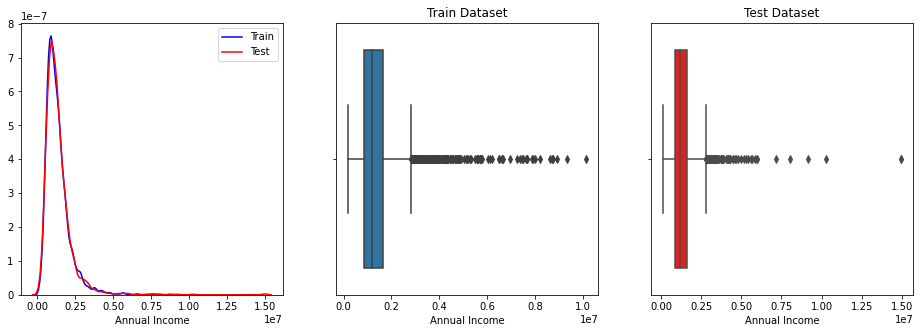

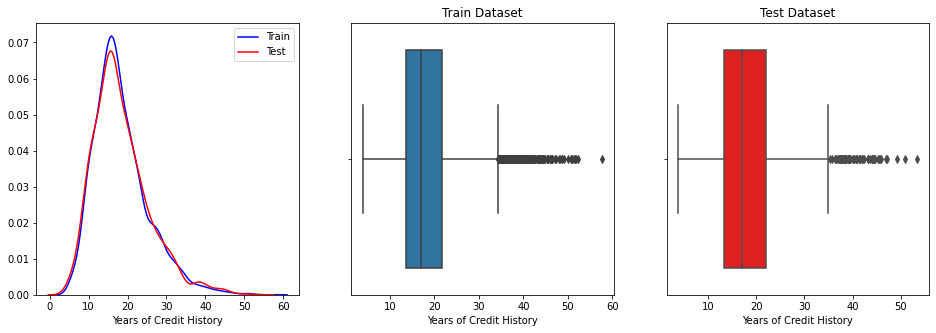

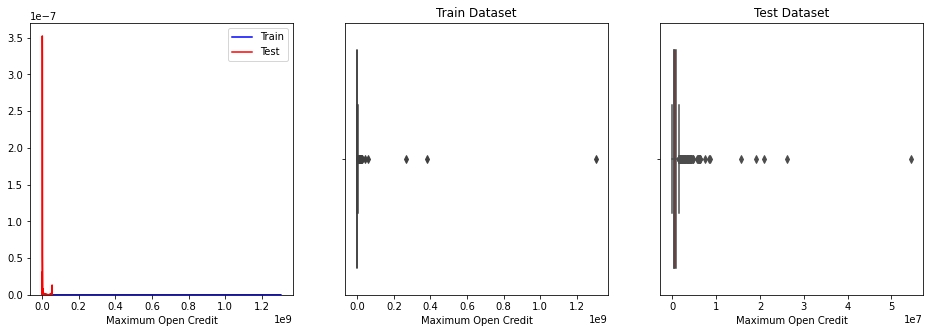

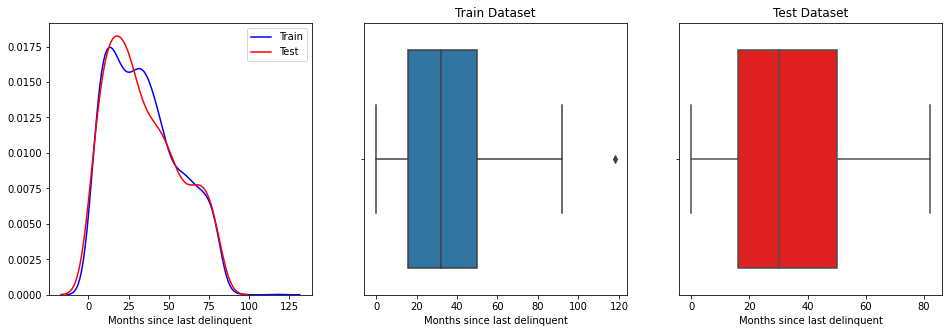

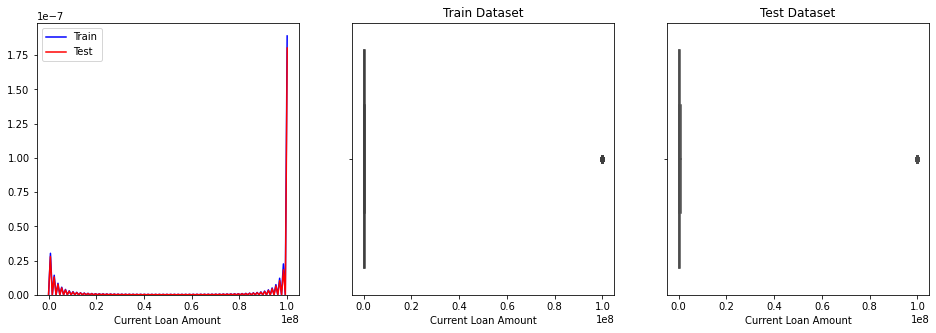

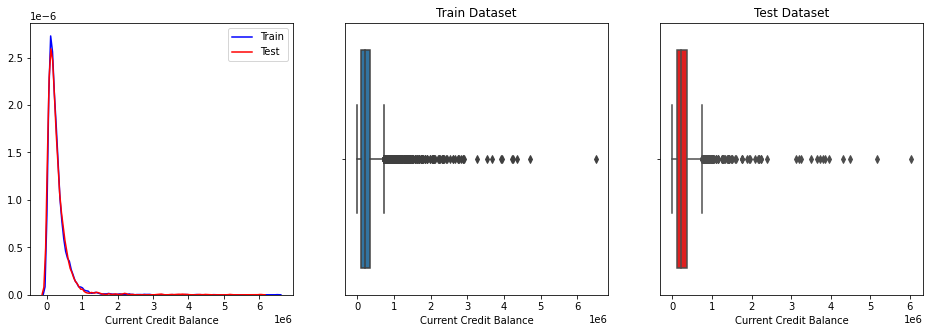

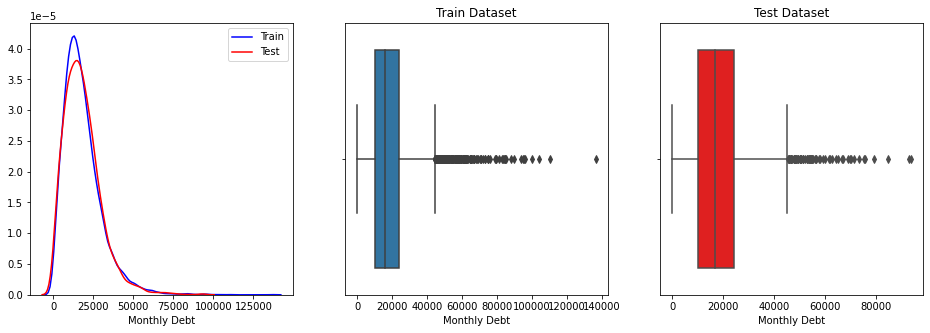

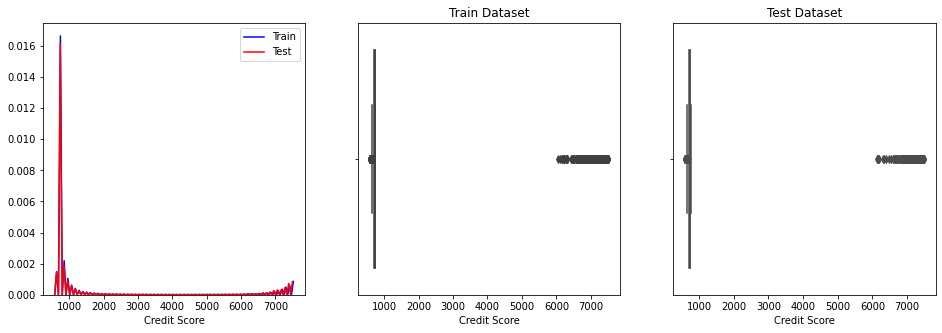

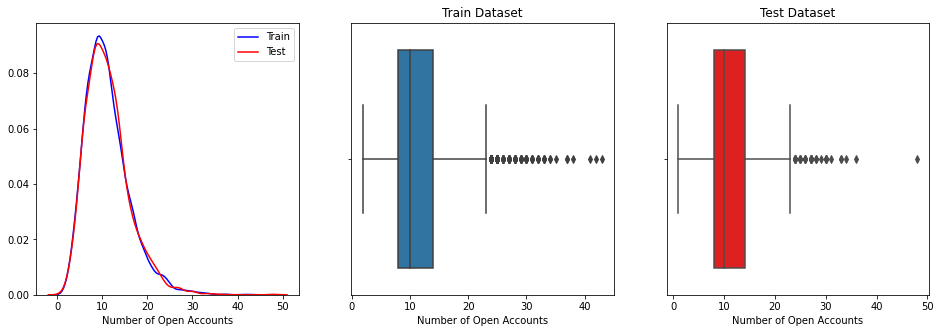

In [8]:
cont_columns = ['Annual Income', 'Years of Credit History','Maximum Open Credit','Months since last delinquent',
            'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score', 'Number of Open Accounts']

semi_cont_columns = ['Tax Liens','Number of Credit Problems', 'Bankruptcies']

category_cols = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

for col in cont_columns:
    get_plots(train_full, test_full,col)

Визуальный анализ показал, что в целом гистограммы однородны и похожи у обоих датасетов, поэтому замена пропущенных данных может производится у тестовых и тренировочных данных независимо друг от друга

Также были выявленны выбросы. Поэтому предлагаю определить верхние границы выбросов таким образом, чтобы оставшийся диапазон тренировочного датасета покрывал данные тестового датасета
  - Annual Income: 7 500 000
  - Years of Credit History: 50
  - Maximum Open Credit: 1e9
  - Months since last delinquent: 100
  - Monthly Debt: 80 000
  - Number of Open Accounts: 40

**полунепрерывные данные**

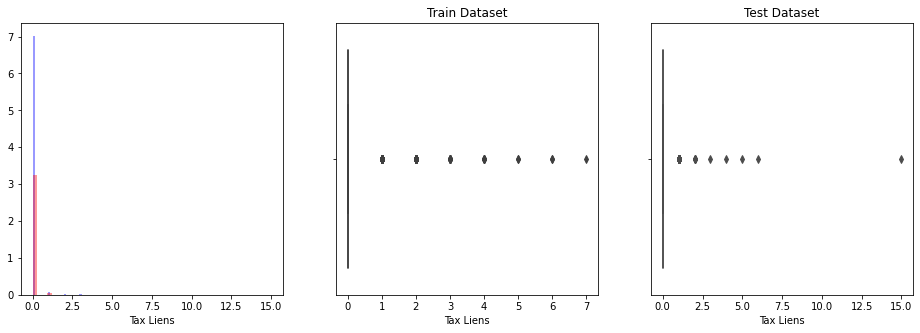

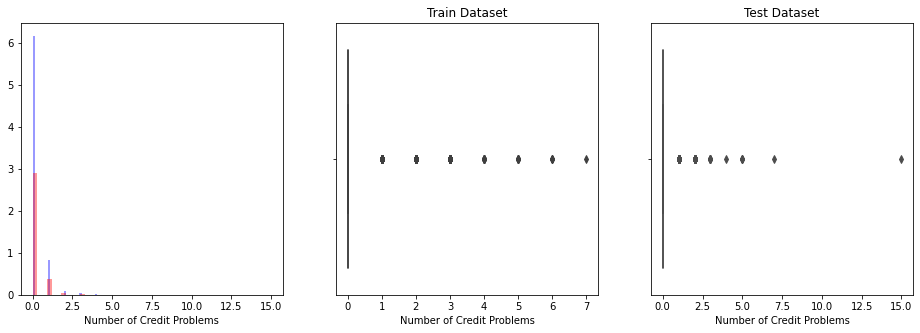

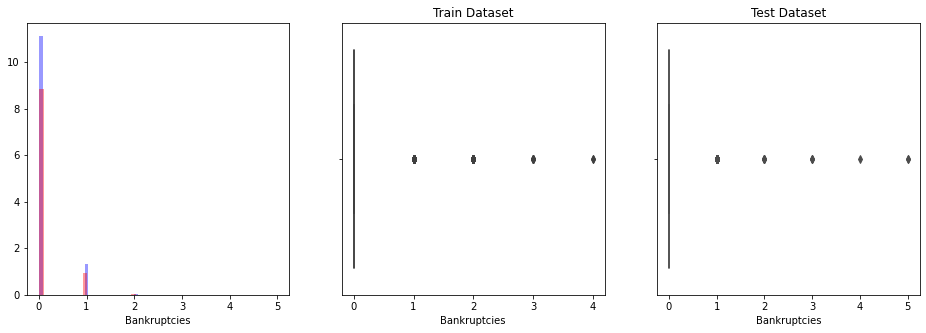

In [9]:
for col in semi_cont_columns:
    get_plots(train_full, test_full,col, hist=True)

Выводы из визуального анализа

Мы видим, что значения выбросов тестовой выборки - больше чем у тренировочной.

Поэтому мы:
  - Проверим данные переменные на корелляцию и PCA
  - Заменим пропуски в Bankruptcies - на значение моды (0) в обоих выборках

**Подготовка данных: Замена пропусков**

Получаем медианы

In [10]:
annual_income_train_median = train_full['Annual Income'].median()
credit_score_train_median = train_full['Credit Score'].median()
annual_income_test_median = test_full['Annual Income'].median()
credit_score_test_median = test_full['Credit Score'].median()
bankrupt_mode = 0.0


Обработка стажа на текущей работе

In [11]:
years_train_table = train_full['Years in current job'].value_counts()
years_train_int = []
for i in years_train_table.index:
    if i == '10+ years':
        years_train_int.append(10)
    elif i == '< 1 year':
        years_train_int.append(0)
    else:
        years_train_int.append(int(i[0]))
    
years_train_avg = [i*j for i,j in zip(np.array(years_train_int), years_train_table.values / years_train_table.sum())]
years_train_avg = str(int(round(sum(years_train_avg))))+' years'

years_test_table = test_full['Years in current job'].value_counts()
years_test_int = []
for i in years_test_table.index:
    if i == '10+ years':
        years_test_int.append(10)
    elif i == '< 1 year':
        years_test_int.append(0)
    else:
        years_test_int.append(int(i[0]))
    
years_test_avg = [i*j for i,j in zip(np.array(years_test_int), years_test_table.values / years_test_table.sum())]
years_test_avg = str(int(round(sum(years_test_avg))))+' years'

**Замена пропусков**

Annual Income

In [12]:
train_full['Annual Income'].fillna(value=annual_income_train_median, inplace=True)
test_full['Annual Income'].fillna(value=annual_income_test_median, inplace=True)

Credit Score

In [13]:
train_full['Credit Score'].fillna(value=credit_score_train_median, inplace=True)
test_full['Credit Score'].fillna(value=credit_score_test_median, inplace=True)

Bankruptcies

In [14]:
train_full['Bankruptcies'].fillna(value=bankrupt_mode, inplace=True)
test_full['Bankruptcies'].fillna(value=bankrupt_mode, inplace=True)

Years in current job

In [15]:
train_full['Years in current job'].fillna(value=years_train_avg, inplace=True)
test_full['Years in current job'].fillna(value=years_test_avg, inplace=True)

Months since last delinquent

In [16]:
train_full['Months since last delinquent'].fillna(value=0, inplace=True)
test_full['Months since last delinquent'].fillna(value=0, inplace=True)

Delinquent in past

In [17]:
train_full['Delinquent in past'] = [1 if i > 0 else 0 for i in train_full['Months since last delinquent']]
test_full['Delinquent in past'] = [1 if i > 0 else 0 for i in test_full['Months since last delinquent']]

** Проверим пропуски

In [18]:
print(f'число пропусков в TRAIN: {train_full.isna().sum().sum()}')
print(f'число пропусков в TEST: {test_full.isna().sum().sum()}')

число пропусков в TRAIN: 0
число пропусков в TEST: 0


**Проверим категориальные данные на согласованность**

Home Ownership


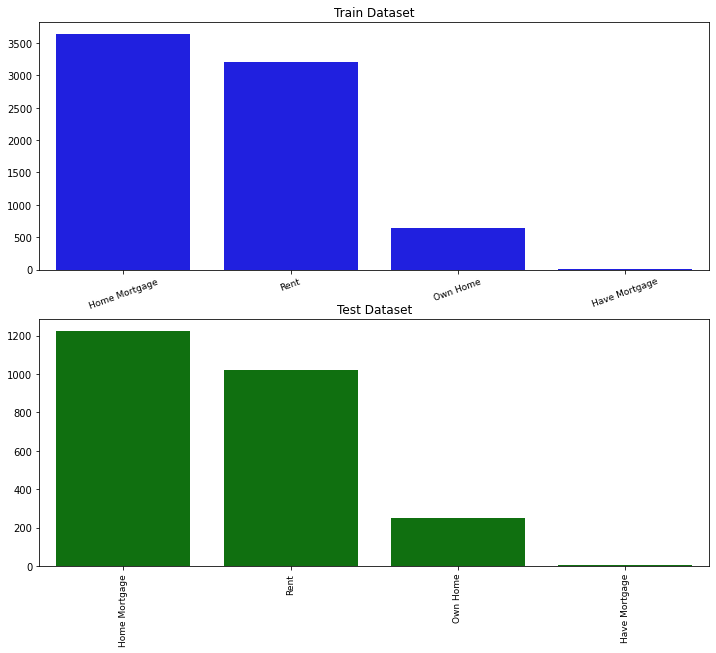

Years in current job


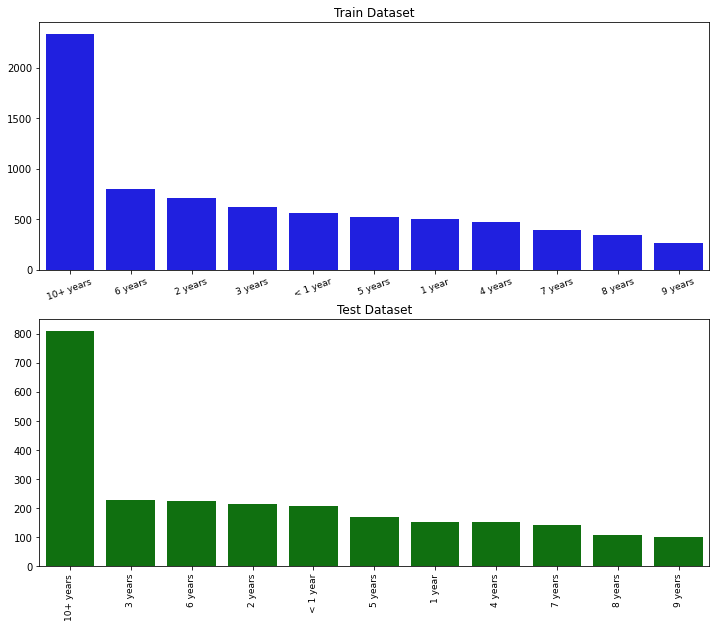

Purpose


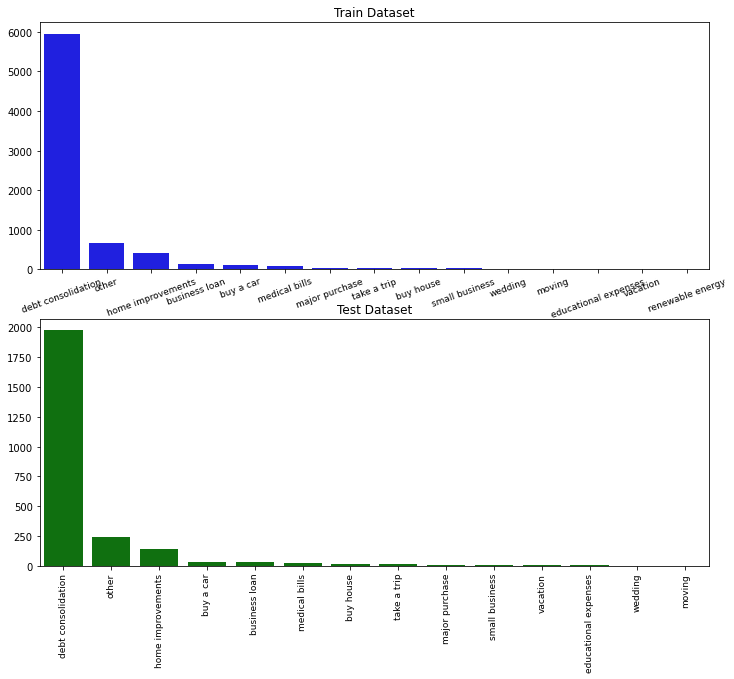

Term


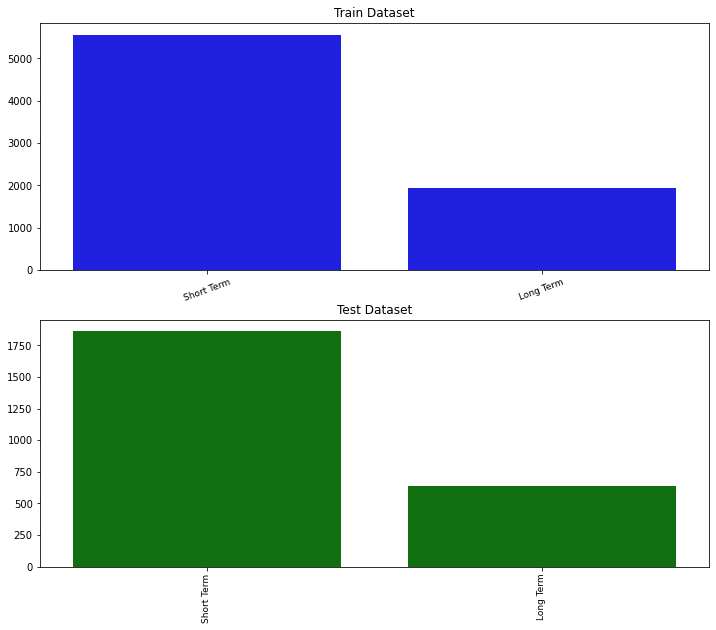

In [19]:
for col in category_cols:
    print(col)
    fig, ax = plt.subplots(2,1,figsize=(12,10))
    train_temp = train_full[col].value_counts()
    test_temp = test_full[col].value_counts()
    ax[0].set_title('Train Dataset')
    ax[1].set_title('Test Dataset')
    ax[0].set_xticklabels(labels=train_temp.index, fontsize = 9, rotation=20)
    ax[1].set_xticklabels(labels=test_temp.index, fontsize = 9, rotation=90)
    sns.barplot(x=train_temp.index, y=train_temp.values, color='b', ax=ax[0])
    sns.barplot(x=test_temp.index, y=test_temp.values, color='g', ax=ax[1])
    plt.show()


Найдена категория renewable_energy в purpose, которая отсутствует в тестовом датасете. Его мы можем удалить из тренировочного датасета.

In [20]:
display(train_full.describe())
display(test_full.describe())

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Delinquent in past
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.325286e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,15.815200,0.116933,1.187318e+07,2.898332e+05,18314.454133,1063.877333,0.281733,0.453467
std,7.567551e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,22.649441,0.346904,3.192612e+07,3.178714e+05,11926.764673,1438.335832,0.449874,0.497863
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,0.000000
25%,9.311330e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,0.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,718.000000,0.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,0.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000,0.000000
75%,1.499974e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,29.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,740.000000,1.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,1.000000


,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Delinquent in past
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2500.000000,2500.00000,2500.000000
mean,1.328252e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,15.614000,0.106800,1.215572e+07,2.963966e+05,18271.340000,1131.19520,0.453600
std,8.211249e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.616348,0.356994,3.226097e+07,3.783020e+05,11543.881469,1564.62781,0.497942
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.00000,0.000000
25%,9.365622e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,0.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,717.00000,0.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,0.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.00000,0.000000
75%,1.488726e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,27.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,741.00000,1.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.00000,1.000000


Подсчитаем количество выбросов на тренировочном датасете

In [21]:
limits = {
    'Annual Income': 7500000,
    'Years of Credit History': 50,
    'Maximum Open Credit': 1e9,
    'Months since last delinquent': 100,
    'Monthly Debt': 80000,
    'Number of Open Accounts': 40
}

In [22]:
total_outliers = []

for key, value in limits.items():
    target_index = train_full.loc[train_full[key]>=value].index
    total_outliers.extend(target_index)
    print(f'На "{key}": {len(target_index)}')

target_index = train_full.loc[train_full['Purpose']=='renewable energy'].index 
total_outliers.extend(target_index)

total_outliers = list(set(total_outliers))
print(f'Общее количество выбросов: {len(total_outliers)}')

На "Annual Income": 14
На "Years of Credit History": 9
На "Maximum Open Credit": 1
На "Months since last delinquent": 1
На "Monthly Debt": 17
На "Number of Open Accounts": 3
Общее количество выбросов: 47


**Удалим выбросы**

In [23]:
train_full.drop(index=total_outliers, axis=0, inplace=True)
print(train_full.shape)

(7453, 18)


**Преобразование данных**

Float to INT

In [24]:
cols_to_int = ['Tax Liens', 'Number of Open Accounts', 'Number of Credit Problems', 'Bankruptcies']
for col in cols_to_int:
    train_full[col] = train_full[col].astype(int)
    test_full[col] = test_full[col].astype(int)

In [25]:
cols_to_cat = ['Home Ownership', 'Years in current job', 'Purpose', 'Term', 'Delinquent in past']
for col in cols_to_cat:
    train_full[col] = train_full[col].astype("category")
    test_full[col] = test_full[col].astype("category")

In [26]:
y_train = train_full['Credit Default']
X_train = train_full.drop(columns=['Credit Default'], axis=1)
X_test = test_full.copy()

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train = X_train.rename(columns={'Years in current job_< 1 year':'Years in current job_less 1 year'})
X_test = X_test.rename(columns={'Years in current job_< 1 year':'Years in current job_less 1 year'})

In [27]:
display(y_train.shape, X_train.shape, X_test.shape)

(7453,)

(7453, 40)

(2500, 40)

### Анализ главных компонент (PCA) и Корреляции

**основные этапы**
- Визуальный анализ Целевой переменной
- Корелляционный анализ
- Изучение наличия кластеров
- PCA
- Итоговое разбиение данных для обучения

**Визуальный анализ целевой переменной**

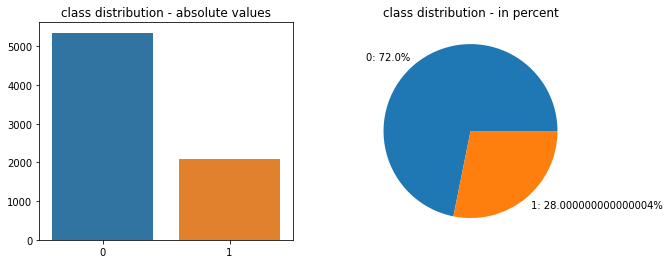

class values


0    5355
1    2098
Name: Credit Default, dtype: int64

In [28]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].set_title('class distribution - absolute values')
ax[1].set_title('class distribution - in percent')
sns.barplot(list(y_train.value_counts().index), list(y_train.value_counts()), ax=ax[0])
labels_percent = [f'{i}: {round(j/len(y_train),2)*100}%' for i,j 
                  in zip(y_train.value_counts().index, y_train.value_counts())]
ax[1].pie(list(y_train.value_counts()/len(y_train)), labels=labels_percent)
plt.show()

print('class values')
display(y_train.value_counts())

**Корелляционный анализ**

In [29]:
cols_to_analyze = ['Tax Liens', 'Number of Credit Problems', 'Bankruptcies']

In [30]:
def correlation_map(corr_matrix):
    "plot given correlation matrix in heatmap style"
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes()
    ax.set_title('HEATMAP for Pearson correllation coef')
    sns.heatmap(corr_matrix, square=True,ax=ax,cmap='PuBu');

**Корелляция непрерывных данных**

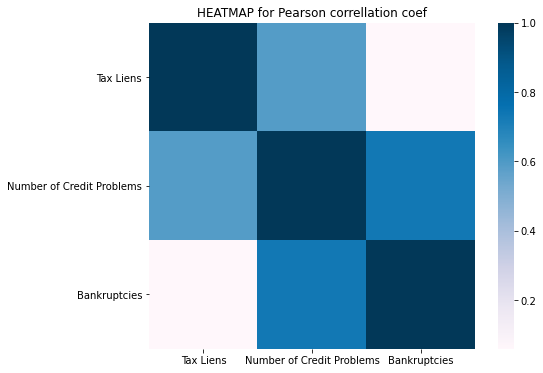

In [31]:
corr_matrix = X_train[cols_to_analyze].corr()
correlation_map(corr_matrix)

**Корелляция всех признаков**

{'Bankruptcies-Number of Credit Problems': 0.7336271171576971,
 'Delinquent in past_1-Months since last delinquent': 0.7673654712903575,
 'Number of Credit Problems-Bankruptcies': 0.7336271171576971,
 'Home Ownership_Rent-Home Ownership_Home Mortgage': -0.8386480704265621,
 'Home Ownership_Home Mortgage-Home Ownership_Rent': -0.8386480704265621,
 'Months since last delinquent-Delinquent in past_1': 0.7673654712903575}

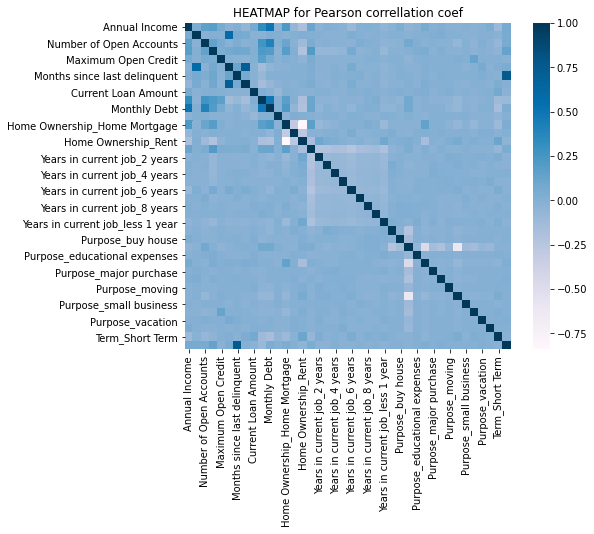

In [32]:
corr_matrix = X_train.corr()
correlation_map(corr_matrix)

correlated_features = dict()
corr_threshold = 0.7

for col in corr_matrix.columns:
    for row in corr_matrix[col].index:
        if corr_threshold < abs(corr_matrix.loc[row, col]) < 1.0:
            pair = f'{row}-{col}'
            correlated_features[pair] = corr_matrix.loc[row, col]

display(correlated_features)

удалим столбец Home Ownership_Rent

In [33]:
X_train.drop(columns=['Home Ownership_Rent'], axis=1, inplace=True)
X_test.drop(columns=['Home Ownership_Rent'], axis=1, inplace=True)

для переменных Банкроство и Credit Problems создадим общую переменную - ПРОИЗВЕДЕНИЕ: Bankrupt_Problem_Credit

In [34]:
relation_train = X_train['Bankruptcies'] * X_train['Number of Credit Problems']
relation_test = X_test['Bankruptcies'] * X_test['Number of Credit Problems']

X_train['Bankrupt_Problem_Credit'] = relation_train
X_test['Bankrupt_Problem_Credit'] = relation_test

X_train.drop(columns=['Bankruptcies', 'Number of Credit Problems'], axis=1, inplace=True)
X_test.drop(columns=['Bankruptcies', 'Number of Credit Problems'], axis=1, inplace=True)

X_train.shape, X_test.shape

((7453, 38), (2500, 38))

**Подбор параметров PCA**

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.iloc[:,:12])
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.iloc[:,:12].columns)
X_train_scaled.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Months since last delinquent,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Home Ownership_Home Mortgage,Home Ownership_Own Home
count,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000
mean,0.156096,0.004198,0.252777,0.316236,0.002015,0.172013,0.118548,0.043908,0.226982,0.069216,0.484100,0.085871
std,0.092697,0.038405,0.134849,0.154071,0.014483,0.246152,0.319213,0.047071,0.141291,0.207826,0.499781,0.280193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.104667,0.000000,0.166667,0.210643,0.000731,0.000000,0.001686,0.017526,0.126260,0.019206,0.000000,0.000000
50%,0.137274,0.000000,0.222222,0.288248,0.001254,0.000000,0.002970,0.032050,0.200977,0.021083,0.000000,0.000000
75%,0.181971,0.000000,0.333333,0.394678,0.002080,0.315217,0.005057,0.054891,0.297423,0.022383,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**PCA - поиск параметра**

In [36]:
from sklearn.decomposition import PCA
break_even = [0.8, 0.9, 0.95, 0.975, 0.99]

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
var_vector = np.cumsum(pca.explained_variance_ratio_)

for level in break_even:
    temp_list = []
    for n in var_vector:
        if n<=level: temp_list.append(n)
    print(f'Необходимое количество для {level*100}%: {len(temp_list)}')  

Необходимое количество для 80.0%: 3
Необходимое количество для 90.0%: 5
Необходимое количество для 95.0%: 6
Необходимое количество для 97.5%: 7
Необходимое количество для 99.0%: 8


Таким образом можно сохранить 99% вариации, сократив пространство непрерывных признаков с 12 до 8, однако это не существенное уменьшение пространства, поэтому механика PCA применена не будет

### Настройка гиперпараметров

**Необходимые импорты**

In [37]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as SM_Pipeline
from sklearn.ensemble import AdaBoostClassifier

**Подготовка данных и базовых настроек**

In [38]:
X_train_reduced, X_valid, y_train_reduced, y_valid = train_test_split(X_train, y_train, test_size=1000, random_state=37)

smote = SMOTE(sampling_strategy='auto', n_jobs=-1)
cv_ = KFold(n_splits=10, shuffle=True, random_state=42)

result_dict = dict()


In [39]:
def parameters_parser(param_grid, model_label):
    param_dict = dict()
    for key, value in param_grid.items():
        param_dict[model_label+"__"+key] = value
    return param_dict

In [40]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels, p_min, p_max, p_step):
    y_predicted_probs = y_predicted_probs[:,1]
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(p_min, p_max, p_step):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()


In [41]:
def update_predict_by_prob(y_true, predict_probas, prob_min, prob_max, prob_steps, score='f1', show_chart=False):
    if score=='f1':
        score_estimator = f1_score
    elif score=='accuracy':
        score_estimator = accuracy_score
    else:
        print('wrong score name')
        return None
    prob_range = np.linspace(prob_min, prob_max, prob_steps)
    scores = []
    for p in prob_range:
        predict_rebalanced = np.array([1 if x>=p else 0 for x in predict_probas[:,1]])
        scores.append(score_estimator(y_true, predict_rebalanced))
    if show_chart:
        figure = plt.figure(figsize = (5, 4))
        plt.ylabel('Scores')
        plt.xlabel('Probability threshold')
        plt.plot(prob_range, scores, label=score, linewidth=4)
        plt.title("Best Threshold Probability Search")
        plt.show()
    scores = np.array(scores)
    best_prob = prob_range[scores.argmax()]
    print(f'best threshold probability = {best_prob}')
    predict_rebalanced_final = np.array([1 if x>=best_prob else 0 for x in predict_probas[:,1]])
    return predict_rebalanced_final, best_prob

#### Настройка логистической регрессии

**Сетка параметров**

In [42]:
pipeline_steps = [
                        ('scaler', MinMaxScaler()),
                        ('oversampler', smote),
                        ('logreg', LogisticRegression(n_jobs=-1, class_weight='balanced', random_state=42))
                        ]
param_grid = {
    'penalty': ['l2'],
    "tol": [1e-6],
    "C": [1],
    'max_iter': [800],
    'solver':['saga'],
    }

**GridSearch**

In [ ]:
print(f'Logistic Regression')
print(70*'-')
param_grid = parameters_parser(param_grid, 'logreg')
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

Logistic Regression
----------------------------------------------------------------------


**Тестовая модель на валидном датасете**

In [ ]:

model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)
predict_probas = pipe2.predict_proba(X_valid)


**Calibrating probability**

In [ ]:
predict_probas = pipe2.predict_proba(X_valid)
show_proba_calibration_plots(predict_probas, y_valid, 0.4, 0.6, 20)
predict2, threshold_prob = update_predict_by_prob(y_valid, predict_probas, 0.4, 0.6, 20, score='f1', show_chart=True)
print(f1_score(y_valid, predict))
print(f1_score(y_valid, predict2))

**Визуализация данных и сохранение в хэш таблицу**

In [ ]:
print(70*'-')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_valid, predict2)}')
print(confusion_matrix(y_valid, predict2))
print(classification_report(y_valid, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict2), f1_score(y_valid, predict2), best_params, threshold_prob)

#### Настройка SVM LINEAR

**Сетка параметров**

In [ ]:
pipeline_steps = [
                        ('scaler', MinMaxScaler()),
                        ('oversampler', smote),
                        ('linear_svc', LinearSVC(random_state=42, class_weight='balanced'))
                        ]

param_grid = {
    'penalty': ['l2'],
    "tol": [1], #1e-5
    "C": [0.1], #1.0
    'max_iter': [2400], #1000
    }

**GridSearch**

In [ ]:
print(f'Linear SVC')
print(70*'-')
param_grid = parameters_parser(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

**Тестовая модель на допустимом наборе данных**

In [ ]:
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)

print(70*'-')
print(f'accuracy on valid set = {accuracy_score(y_valid, predict)}')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on reduced train set = {f1_score(y_train_reduced, predict_train)}')
print(confusion_matrix(y_valid, predict))
print(classification_report(y_valid, predict))

**сохранение в хэш таблицу**

In [ ]:
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict), f1_score(y_valid, predict), best_params, None)

#### Настройка RBF SVM

In [ ]:
pipeline_steps = [
    ('scaler', MinMaxScaler()),
    ('oversampler', smote),
    ('rbfsvm', SVC(random_state=42, class_weight='balanced'))
]

param_grid = {
    'kernel': ['rbf'],
    "tol": [1],
    "degree": [3],
    'C': [0.1],
}

**GridSearch**

In [ ]:
print(f'RBF SVC')
print(70*'-')
param_grid = parameters_parser(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

In [ ]:
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)

print(70*'-')
print(f'accuracy on valid set = {accuracy_score(y_valid, predict)}')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on reduced train set = {f1_score(y_train_reduced, predict_train)}')
print(confusion_matrix(y_valid, predict))
print(classification_report(y_valid, predict))

In [ ]:
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict), f1_score(y_valid, predict), best_params, None)

#### Настройка Naive Bayes Classifier

In [ ]:
pipeline_steps = [
    ('oversampler', smote),
    ('bayes', GaussianNB())
]

param_grid = {
    'var_smoothing': [1e-14],
}

**GridSearch**

In [ ]:
print(f'BAYES')
print(70*'-')
param_grid = parameters_parser(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

**Тестовая модель на допустимом наборе данных**

In [ ]:

model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)

**Калибровка**

In [ ]:

predict_probas = pipe2.predict_proba(X_valid)
show_proba_calibration_plots(predict_probas, y_valid, 0.1, 0.9, 10)
predict2, threshold_prob = update_predict_by_prob(y_valid, predict_probas, 0.35, 0.48, 20, score='f1', show_chart=True)
print(f1_score(y_valid, predict))
print(f1_score(y_valid, predict2))

In [ ]:

print(70*'-')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_valid, predict2)}')
print(confusion_matrix(y_valid, predict2))
print(classification_report(y_valid, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict), f1_score(y_valid, predict), best_params, threshold_prob)

#### Настройка RandomForest

In [ ]:
pipeline_steps = [
    ('oversampler', smote),
    ('rf', RandomForestClassifier(n_jobs=-1,  class_weight='balanced', random_state=42))
]

param_grid = {
    'n_estimators': [1500], 
    'max_depth': [7],
    'min_samples_split':[100],
}


**GridSearch**

In [ ]:
print(f'RANDOM FOREST')
print(70*'-')
param_grid = parameters_parser(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

**Тестовая модель на допустимом наборе данных**

In [ ]:
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)

**Калибровка вероятностей**

In [ ]:
predict_probas = pipe2.predict_proba(X_valid)
show_proba_calibration_plots(predict_probas, y_valid, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_valid, predict_probas, 0.3, 0.6, 150, score='f1', show_chart=True)
print(f1_score(y_valid, predict))
print(f1_score(y_valid, predict2))

**Вывод и сохранение данных**

In [ ]:
print(70*'-')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_valid, predict2)}')
print(confusion_matrix(y_valid, predict2))
print(classification_report(y_valid, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict2), f1_score(y_valid, predict2), best_params, threshold_prob)

#### Настройка XGBoost

In [ ]:
pipeline_steps = [
    ('oversampler', smote),
    ('xgb', xgb.XGBClassifier(n_jobs=-1, random_state=42))
]

param_grid = {
    'base_score': [0.7],
    'booster': ['gbtree'], 
    'n_estimators': [12],
    'learning_rate': [1e-1], #0.01
    'max_depth': [5],
    'reg_lambda': [0.1], # 0.1
    'gamma': [1e-3]
}

**GridSearch**

In [ ]:
print(f'XG-BOOST')
print(70*'-')
param_grid = parameters_parser(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)


**Тестовая модель на допустимом наборе данных**

In [ ]:
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)

In [ ]:
predict_probas = pipe2.predict_proba(X_valid)
show_proba_calibration_plots(predict_probas, y_valid, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_valid, predict_probas, 0.40, 0.55, 100, score='f1', show_chart=True)
print(f1_score(y_valid, predict))
print(f1_score(y_valid, predict2))

In [ ]:

print(70*'-')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_valid, predict2)}')
print(confusion_matrix(y_valid, predict2))
print(classification_report(y_valid, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict2), f1_score(y_valid, predict2), best_params, threshold_prob)

#### Настройка ADAboost

In [ ]:
pipeline_steps = [
    ('oversampler', smote),
    ('ada', AdaBoostClassifier(random_state=42))
]

param_grid = {
    'n_estimators': [7], 
    'learning_rate':[1]
}

**GridSearch**

In [ ]:
print(f'ADA-BOOST')
print(70*'-')
param_grid = parameters_parser(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

**Тестовая модель на допустимом наборе данных**

In [ ]:
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)

**Калибровака**

In [ ]:
predict_probas = pipe2.predict_proba(X_valid)
show_proba_calibration_plots(predict_probas, y_valid, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_valid, predict_probas, 0.4, 0.55, 100, score='f1', show_chart=True)
print(f1_score(y_valid, predict))
print(f1_score(y_valid, predict2))

**Вывод информации и сохранение**

In [ ]:
print(70*'-')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_valid, predict2)}')
print(confusion_matrix(y_valid, predict2))
print(classification_report(y_valid, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict2), f1_score(y_valid, predict2), best_params, threshold_prob)

#### Настройка Light-boost

In [ ]:
pipeline_steps = [
    ('oversampler', smote),
    ('light', lgbm.LGBMClassifier(n_jobs=-1, random_state=42, class_weight='balanced'))
]


param_grid = {
    'boosting_type': ['goss'],
    'n_estimators': [60],
    'learning_rate': [1e-1], #0.1
    'max_depth': [5],
    'reg_lambda': [0.1], 
    'num_leaves': [300] 
    }

**GridSearch**

In [ ]:
print(f'LIGHT-BOOST')
print(70*'-')
param_grid = parameters_parser(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

**Тестовая модель на допустимом наборе данных**

In [ ]:
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)

**Калибровка вероятностей**

In [ ]:
predict_probas = pipe2.predict_proba(X_valid)
show_proba_calibration_plots(predict_probas, y_valid, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_valid, predict_probas, 0.3, 0.51, 200, score='f1', show_chart=True)
print(f1_score(y_valid, predict))
print(f1_score(y_valid, predict2))

In [ ]:
print(70*'-')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_valid, predict2)}')
print(confusion_matrix(y_valid, predict2))
print(classification_report(y_valid, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict2), f1_score(y_valid, predict2), best_params, threshold_prob)

#### Настройка Cat-boost

In [ ]:
pipeline_steps = [
                    ('oversampler', smote),
                    ('cat', catb.CatBoostClassifier(random_state=42, thread_count=-1, silent=True))
                     ]


param_grid = {
    'boosting_type': ['Plain'],
    'n_estimators': [15],
    'max_depth': [5],
    'l2_leaf_reg': [1], 
    }

**GridSearch**

In [ ]:
print(f'CAT-BOOST')
print(70*'-')
param_grid = parameters_parser(param_grid, pipeline_steps[-1][0])
pipe = SM_Pipeline(pipeline_steps)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=cv_)
grid.fit(X_train_reduced, y_train_reduced)
best_model = grid.best_estimator_[-1]
print(f'best f1 score on CV = {grid.best_score_}')
best_params = best_model.get_params()
print(best_params)

**Тестовая модель на допустимом наборе данных**

In [ ]:
model_label = pipeline_steps[-1][0]
pipeline_steps2 = pipeline_steps.copy()
pipeline_steps2[-1] = (model_label, best_model)
pipe2 = SM_Pipeline(pipeline_steps2)
pipe2.fit(X_train_reduced, y_train_reduced)
predict = pipe2.predict(X_valid)
predict_train = pipe2.predict(X_train_reduced)

**Калибровка вероятностей**

In [ ]:
predict_probas = pipe2.predict_proba(X_valid)
show_proba_calibration_plots(predict_probas, y_valid, 0.1, 0.9, 20)
predict2, threshold_prob = update_predict_by_prob(y_valid, predict_probas, 0.2, 0.6, 200, score='f1', show_chart=True)
print(f1_score(y_valid, predict))
print(f1_score(y_valid, predict2))

In [ ]:

print(70*'-')
print(f'f1 on valid set = {f1_score(y_valid, predict)}')
print(f'f1 on valid set after calibrating = {f1_score(y_valid, predict2)}')
print(confusion_matrix(y_valid, predict2))
print(classification_report(y_valid, predict2))
label = pipeline_steps[-1][0]+'_tuned'
result_dict[label] = (accuracy_score(y_valid, predict2), f1_score(y_valid, predict2), best_params, threshold_prob)

#### Соберем результаты в dataframe

In [ ]:
all_models_results = pd.DataFrame(columns=['label', 'f1_score', 'accuracy_score', 'hyperparams','threshold_prob'])
all_models_results.label = list(result_dict.keys())
all_models_results.f1_score = list(i[1] for i in result_dict.values())
all_models_results.accuracy_score = list(i[0] for i in result_dict.values())
all_models_results.hyperparams = list(i[2] for i in result_dict.values())
all_models_results.threshold_prob = list(i[3] for i in result_dict.values())

In [ ]:
all_models_results

#### Сохранение сравнительной таблицы

In [ ]:
import pickle

with open('all_models_results.pkl', 'wb') as file:
    pickle.dump(all_models_results, file)

### Обучение финальной модели

**описание действий**
- Загрузка выбранного экземпляра модели
- Подготовка данных (Тестовая Выборка)
- Обучение модели
- Генерация прогноза

#### Загрузка и просмотр сравнительной таблицы

In [ ]:
with open('all_models_results.pkl', 'rb') as file:
    comparative_table = pickle.load(file)

display(comparative_table)

f, (ax1) = plt.subplots(1, 1, figsize=(14, 5), sharex=True)
x = comparative_table.label
y1 = comparative_table.f1_score
y2 = comparative_table.accuracy_score
sns.pointplot(x=x, y=y1, color='g', ax=ax1,label='f1', markers='o')
sns.pointplot(x=x, y=y2, color='b', ax=ax1, markers='s', label='acc')
ax1.axhline(0.5, color="r", clip_on=True, label='threshold', linestyle='-.');

На графике выше представлены сводные результаты расчетов на различных моделях
- за исключением Bayes, показатели f1 всех моделей слегка превышают пороговое значение 0.5 и варьируются в пределах 0,52-0,56
- при этом вариация accuracy_score чуть выше: от 0,68 до 0,76
- наиболее сбалансированные метрики демонстрируют Random Forest, CAT и XG-Boost
- в качестве финальной модели выбран вариант Random Forest

#### Обучение модели на полном датасете (X_train)


In [ ]:
final_params = comparative_table.loc[comparative_table.label=='rf_tuned'].hyperparams.values[0]
threshold_prob = comparative_table.loc[comparative_table.label=='rf_tuned'].threshold_prob.values[0]

pipeline_steps = [
                    ('oversampler', smote),
                    ('rf', RandomForestClassifier(**final_params))
                     ]

model = SM_Pipeline(pipeline_steps)
model.fit(X_train, y_train)

predict_train_probas = model.predict_proba(X_train)
predict_train = np.array([1 if x>=threshold_prob else 0 for x in predict_train_probas[:,1]])

print('Random Forest: Final Model')
print(70*'-')
print(f'accuracy on full train set = {accuracy_score(y_train, predict_train)}')
print(f'f1 on full train set = {f1_score(y_train, predict_train)}')
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))
print(70*'-')

#### Генерация  и  экспорт прогноза

In [ ]:
y_pred_probas = model.predict_proba(X_test)
y_pred = np.array([1 if x>=threshold_prob else 0 for x in y_pred_probas[:,1]])
y_pred = pd.DataFrame(y_pred, columns=['Credit Default'])

print(y_pred.shape)

#### Экспорт результатов

In [ ]:
import csv
filename = 'PetrosyanKG_predictions.csv'
y_pred.to_csv(filename, index=None)